# **Árvore de Decisão - Conceitos e Aplicações**

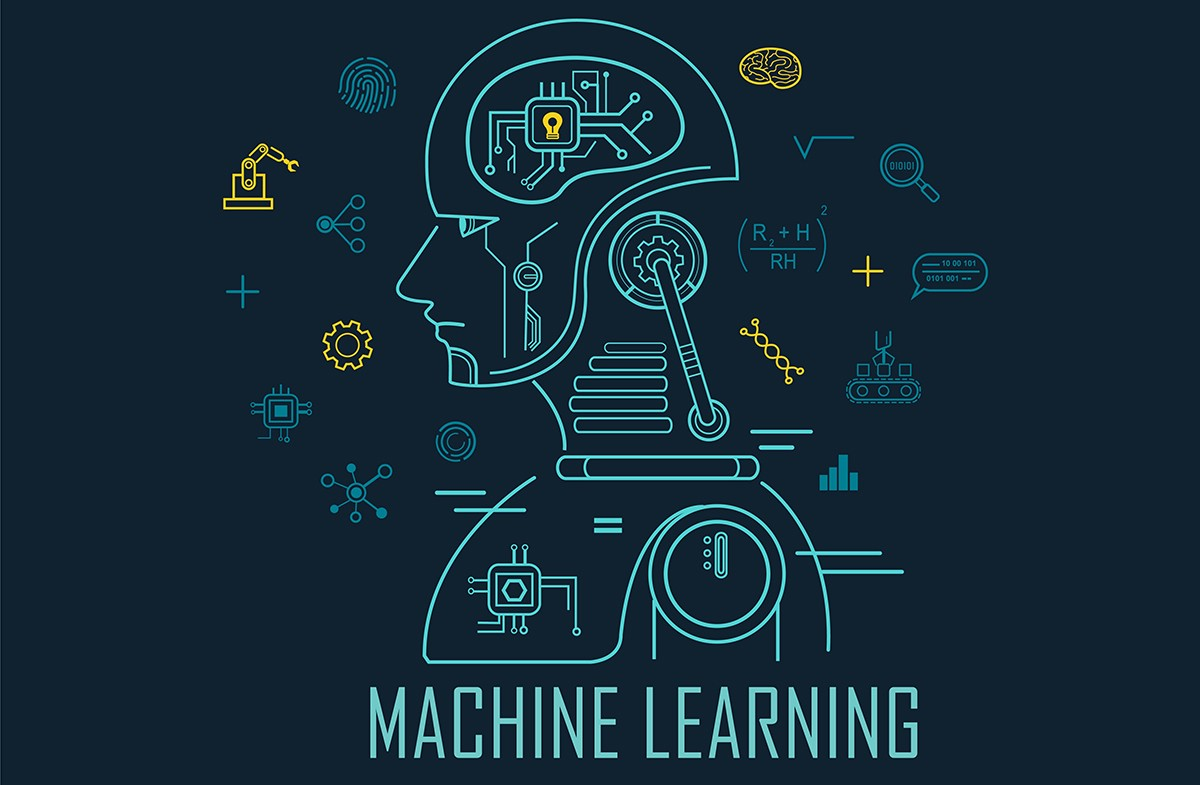

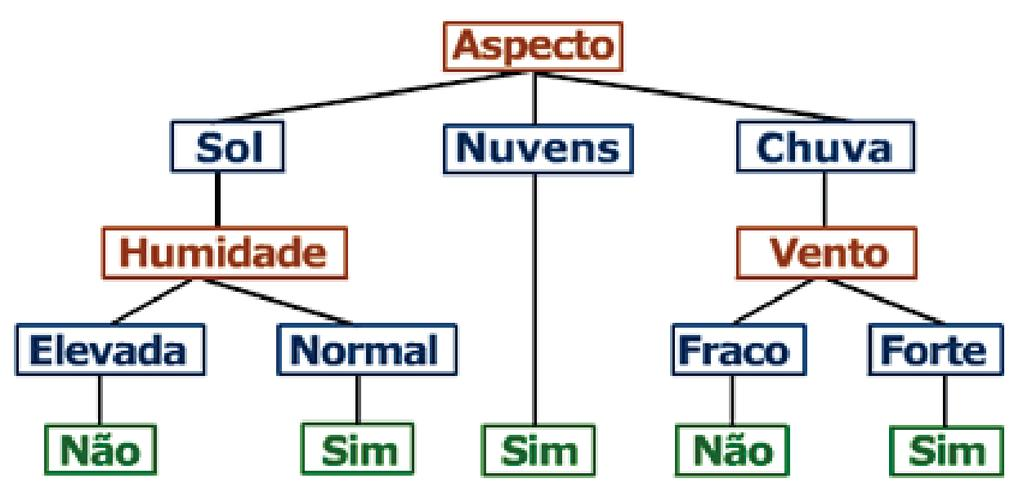

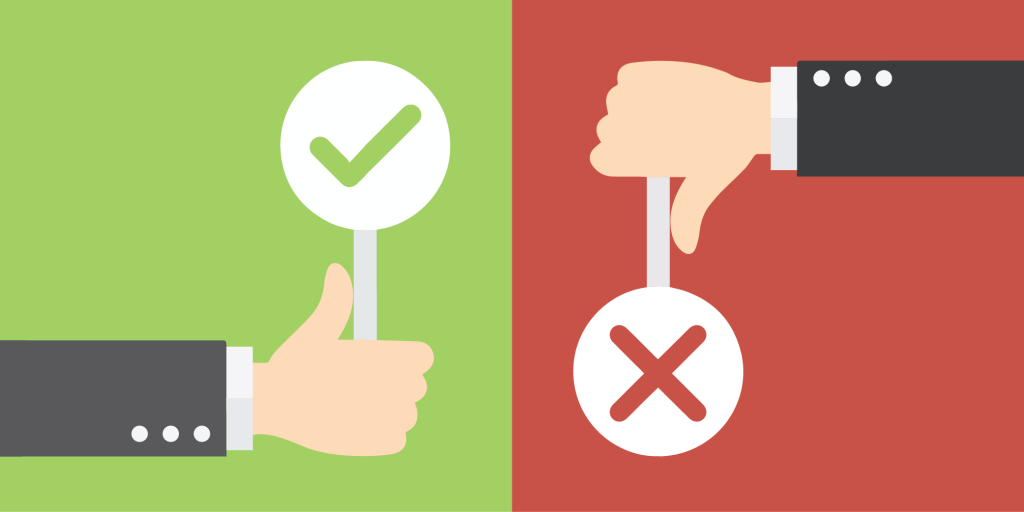

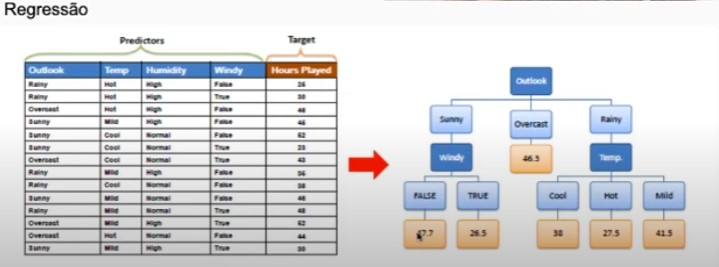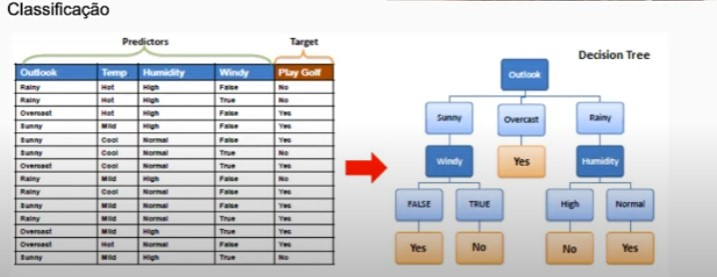

#### Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

### Carregando a Base de dados

In [ ]:
df_diabetes = pd.read_csv('sample_data/diabetes.csv')

In [ ]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Dividindo os dados em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.drop('Outcome',axis=1),df_diabetes['Outcome'],test_size=0.3)

#### Verificando a forma dos dados

In [ ]:
X_train.shape,X_test.shape

((537, 8), (231, 8))

In [ ]:
y_train.shape,y_test.shape

((537,), (231,))

#### Instânciando o objeto classificador

In [ ]:
clf = DecisionTreeClassifier()

#### Treinando o modelo de arvore de decisão

In [ ]:
clf = clf.fit(X_train,y_train)

#### Verificando as features mais importantes para o modelo treinado

In [ ]:
clf.feature_importances_

array([0.07944826, 0.26014041, 0.07211848, 0.03584725, 0.13385207,
       0.15098749, 0.13020868, 0.13739736])

In [ ]:
for feature,importancia in zip(df_diabetes.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

Pregnancies:0.07944825792265418
Glucose:0.2601404098889515
BloodPressure:0.07211848129971159
SkinThickness:0.03584725472248244
Insulin:0.1338520659276888
BMI:0.1509874891719125
DiabetesPedigreeFunction:0.13020868368281205
Age:0.13739735738378703


In [ ]:
resultado = clf.predict(X_test)
resultado

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       156
           1       0.47      0.57      0.52        75

    accuracy                           0.65       231
   macro avg       0.62      0.63      0.62       231
weighted avg       0.67      0.65      0.66       231



#### Renderizando a árvore de forma interativa

In [ ]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

In [ ]:
# feature matrix
X,y = df_diabetes.drop('Outcome',axis=1),df_diabetes['Outcome']

# feature labels
features_label = df_diabetes.drop('Outcome',axis=1).columns

# class label
class_label = ['0','1']


def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))
    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,5)
   , min_samples_leaf=(1,5))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…